# Path iterating

This exercise worksheet is designed to help you grasp the concept of python iterators especillay in the context of recursive génération of combinatorial objects.

## Iterators

### What's an iterator?

An iterator is a ``list creator'' it generates objects one by one instead of all at once. Iterators are present everywhre in python and are very easy to create.

For example, the `range` object uses an iterator.

In [1]:
range(10)

range(0, 10)

By default, the list of numbers is not created. I create the list explcitly

In [8]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Or I can iterate through the numbers for example in a for loop

In [9]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


### the `yield` statement

The "normal" way for a python function to return data is to use the `return` statetement as in the following example.

In [10]:
def my_stupid_function():
    return [1,2,3]

In [11]:
L = my_stupid_function()
L

[1, 2, 3]

Whatever is written after the `return` statement is never executed

In [14]:
def my_other_stupid_function():
    print("This is printed")
    return [1,2,3]
    print("I will never print")
    return 4 # never executed

In [15]:
L = my_other_stupid_function()
L

This is printed


[1, 2, 3]

Whenever we use instead the `yield` statement, the function actually returns an *iterator*.

In [28]:
def my_stupid_iterator():
    print("This first line is printed")
    yield 1
    print("This second line is printed")
    yield 2
    print("This third line is printed")
    yield 3

The function is not directly executed when called.

In [29]:
it = my_stupid_iterator()
it

<generator object my_stupid_iterator at 0x7fe4c25a7880>

If I call the `next` function on my iterator, the function is executed until it reaches the first `yield` statement. Calling `next` return the first yielded value

In [30]:
v = next(it)

This first line is printed


In [31]:
v

1

Each time I call `next`, the function *continues* its execution until it is stopped by a `yield` statement. If there are no more `yield`, the iterator is over (and `next` throws an error)

In [32]:
v = next(it)

This second line is printed


In [33]:
v

2

In [34]:
v = next(it)

This third line is printed


In [35]:
v

3

In [36]:
next(it)

StopIteration: 

In practice, we rarelly use `next`. An iterator is either directly tranformed into a list or another structure, or iterated on using a for loop.

In [37]:
L = list(my_stupid_iterator())
L

This first line is printed
This second line is printed
This third line is printed


[1, 2, 3]

In [38]:
T = tuple(my_stupid_iterator()) # a tuple is a list that cannot be modified later
T

This first line is printed
This second line is printed
This third line is printed


(1, 2, 3)

In [40]:
d = {v:0 for v in my_stupid_iterator()} # this is a python dictionary
d

This first line is printed
This second line is printed
This third line is printed


{1: 0, 2: 0, 3: 0}

In [41]:
for v in my_stupid_iterator():
    print(v)

This first line is printed
1
This second line is printed
2
This third line is printed
3


**Exercice** The following function creates the list of the $n^{th}$ first prime numbers, create a similar function returning an iterator.

In [44]:
def my_primes_list(n):
    L = []
    v = 2
    c = 0
    while c < n:
        if is_prime(v):
            L.append(v)
            c+=1
        v+=1
    return L

In [45]:
L = my_primes_list(10)
L

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

In [46]:
def my_primes_iterator(n):
    # write your code here
    # begin solution
    v = 2
    c = 0
    while c < n:
        if is_prime(v):
            yield v
            c+=1
        v+=1
    # end solution

In [47]:
my_primes_iterator(10) # <generator object my_primes_iterator at 0x...>

<generator object my_primes_iterator at 0x7fe4c22fa180>

In [49]:
L = list(my_primes_iterator(10)) # the actual list
L 

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

## Paths

### Definition

We are going to use iterators to recursively generate list of paths with certain properties. 

We consider a "path" on the plane as a list of "steps" where a step is just a 2 dimensional vector (we consider that paths start at $(0,0)$). See the example below

In [50]:
step0 = (1,0)
step1 = (0,1)

In [51]:
a_path = [step0,step0,step1,step0]
a_path

[(1, 0), (1, 0), (0, 1), (1, 0)]

The following function returns an interator on the actual positions of the path on the plane and can be used to plot the path using `line2d`

In [55]:
def position_iterator(path):
    x = 0
    y = 0
    yield (x,y)
    for step in path:
        x+= step[0]
        y+= step[1]
        yield (x,y)

def plot_path(path):
    return line2d(position_iterator(path))

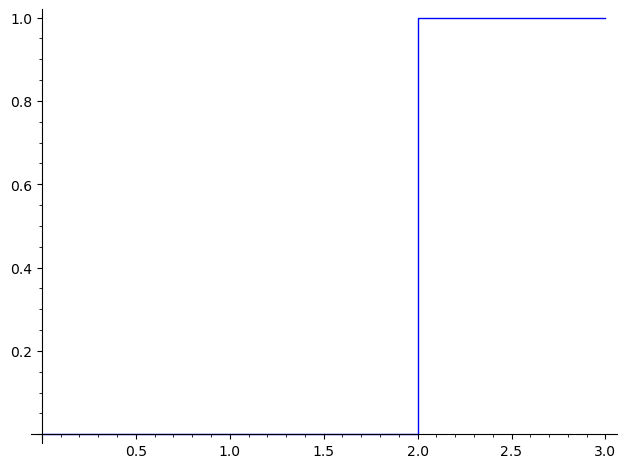

In [56]:
plot_path(a_path)

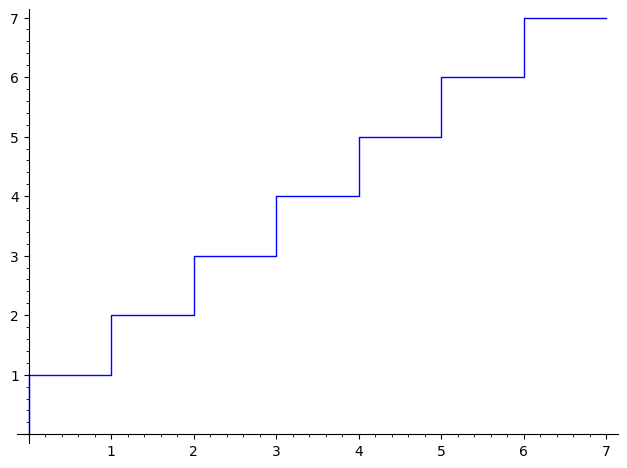

In [58]:
stair_case = [step1, step0, step1, step0, step1, step0, step1, step0, step1, step0, step1, step0, step1, step0]
plot_path(stair_case)

Note that our code can works with any kind of 2 dimensional step

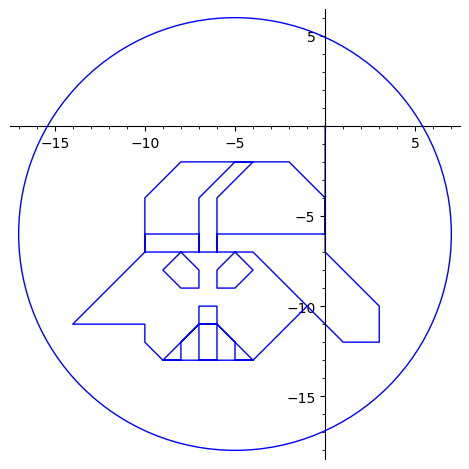

In [59]:
dark_vador_path =  [(0,-1), (0,-1), (0, -1), (0,-1), (0,-1), (0,-1), (0,-1), (1,-1), (1,-1), (1,-1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,1), (-1,1), (-1,-1), (-1,-1), (-1,-1), (-1,0), (1,0), (-1,1), (0,-1), (-1,0), (0,1), (0,1), (1,-1), (-1,1),(0,1), (-1,0), (0, -1), (1,0),(-1,0), (0,-1), (0,-1), (1,0), (-1,0), (-1,0), (0,1), (1,1), (-1,-1), (-1, -1), (1, 0), (-1,0), (-1,1), (0,1), (-1,0), (-1,0), (-1,0), (-1,0), (1,1), (1,1), (1,1), (1,1), (0,1), (0,1), (0,1), (1,1), (1,1), (1,0), (1,0), (1,0), (-1, -1), (-1, -1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,0), (0,-1), (1,0), (1,0), (-1,-1), (1,-1), (1,0), (0,1), (-1,1), (1,0), (0,1), (0,-1), (1,0), (0,1), (0,1), (0,1), (1,1), (1,1), (-1,0), (1,0), (1,0), (1,0), (1,-1), (1,-1), (0,-1), (0,-1), (-1,0), (-1,0), (-1,0), (-1,0), (-1,0), (-1,0), (0,-1), (1,0), (-1,-1), (0,-1), (1,0), (1,1), (-1,1), (1,0), (1,-1), (1,-1), (1,-1)]
plot_path(dark_vador_path) + circle((-5,-6), 12) 

### Recursive generation

Our goal is to generate all paths starting at $(0,0)$ and using the two following steps

In [60]:
step0 = (1,0)
step1 = (0,1)

See the following function that generate paths of length $0$, $1$, and $2$.

In [61]:
def paths0():
    yield []

def paths1():
    yield [step0]
    yield [step1]

def paths2():
    steps = [step0, step1]
    for path in paths1():
        for step in steps:
            yield path + [step]

In [63]:
list(paths0())

[[]]

In [64]:
list(paths1())

[[(1, 0)], [(0, 1)]]

In [65]:
list(paths2())

[[(1, 0), (1, 0)], [(1, 0), (0, 1)], [(0, 1), (1, 0)], [(0, 1), (0, 1)]]

**Exercise** write a recursive funtion that generates all paths of length $n$.

In [69]:
def paths(n):
    # write your code here
    # begin solution
    steps = [step0, step1]
    if n == 0:
        yield []
    else:
        for path in paths(n-1):
            for step in steps:
                yield path + [step]
    # end solution

In [70]:
# does it work?
list(paths(0))

[[]]

In [71]:
list(paths(1))

[[(1, 0)], [(0, 1)]]

In [72]:
list(paths(2))

[[(1, 0), (1, 0)], [(1, 0), (0, 1)], [(0, 1), (1, 0)], [(0, 1), (0, 1)]]

In [73]:
list(paths(3))

[[(1, 0), (1, 0), (1, 0)],
 [(1, 0), (1, 0), (0, 1)],
 [(1, 0), (0, 1), (1, 0)],
 [(1, 0), (0, 1), (0, 1)],
 [(0, 1), (1, 0), (1, 0)],
 [(0, 1), (1, 0), (0, 1)],
 [(0, 1), (0, 1), (1, 0)],
 [(0, 1), (0, 1), (0, 1)]]

In [75]:
# we check that we have the right number of paths
assert len(list(paths(0))) == 1
assert len(list(paths(1))) == 2
assert len(list(paths(2))) == 4
assert len(list(paths(3))) == 8
assert len(list(paths(4))) == 16

**Exercise** Generate all paths using steps $(1,0)$ and $(0,1)$ ending at a specific position $(a,b)$

Note: do NOT generate all paths and check their final position, do better!

In [76]:
def paths_end(a,b):
    # write your code here
    # begin solution
    if a == 0 and b == 0:
        yield []
    elif a <0 or b < 0:
        return
    else:
        for path in paths_end(a-1,b):
            yield path + [(1,0)]
        for path in paths_end(a,b-1):
            yield path + [(0,1)]
    # end solution

In [77]:
list(paths_end(0,0)) # only the empty path

[[]]

In [78]:
list(paths_end(1,0)) # one path

[[(1, 0)]]

In [79]:
list(paths_end(0,1)) # one path

[[(0, 1)]]

In [80]:
list(paths_end(1,1)) # two paths

[[(0, 1), (1, 0)], [(1, 0), (0, 1)]]

In [81]:
assert len(list(paths_end(0,0))) == 1
assert len(list(paths_end(1,1))) == 2
assert len(list(paths_end(2,2))) == 6
assert len(list(paths_end(3,3))) == 20
assert len(list(paths_end(4,4))) == 70

**Exercise** Generate all paths using steps $(1,0)$ and $(0,1)$ ending at a specific position $(a,b)$ and never going under the diagonal $y = x$.

In [82]:
def paths_up_end(a,b):
    # write your code here
    # begin solution
    if a == 0 and b == 0:
        yield []
    elif a <0 or b < a:
        return
    else:
        for path in paths_up_end(a-1,b):
            yield path + [(1,0)]
        for path in paths_up_end(a,b-1):
            yield path + [(0,1)]
    # end solution

In [83]:
list(paths_up_end(0,0)) # only the empty path

[[]]

In [84]:
list(paths_up_end(0,1)) # one path

[[(0, 1)]]

In [85]:
list(paths_up_end(1,1)) # one path

[[(0, 1), (1, 0)]]

In [86]:
list(paths_up_end(2,2)) # two paths

[[(0, 1), (0, 1), (1, 0), (1, 0)], [(0, 1), (1, 0), (0, 1), (1, 0)]]

In [87]:
list(paths_up_end(3,3)) # 5 paths

[[(0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (1, 0)],
 [(0, 1), (0, 1), (1, 0), (0, 1), (1, 0), (1, 0)],
 [(0, 1), (1, 0), (0, 1), (0, 1), (1, 0), (1, 0)],
 [(0, 1), (0, 1), (1, 0), (1, 0), (0, 1), (1, 0)],
 [(0, 1), (1, 0), (0, 1), (1, 0), (0, 1), (1, 0)]]

In [88]:
assert len(list(paths_up_end(0,0))) == 1
assert len(list(paths_up_end(1,1))) == 1
assert len(list(paths_up_end(2,2))) == 2
assert len(list(paths_up_end(3,3))) == 5
assert len(list(paths_up_end(4,4))) == 14
assert len(list(paths_up_end(5,5))) == 42

Have fun : what other paths can you generate?